In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
# Leer los archivos CSV y asignar el nombre del país a cada DataFrame
df_chile = pd.read_csv('chile_earthquake_data.csv', encoding='latin-1')
df_chile['Country'] = 'Chile'

df_japan = pd.read_csv('japan_earthquake_data.csv', encoding='utf-8')
df_japan['Country'] = 'Japan'

df_usa = pd.read_csv('usa_earthquake_data.csv', encoding='latin-1')
df_usa['Country'] = 'USA'

# Concatenar los DataFrames uno debajo del otro
df = pd.concat([df_chile, df_japan, df_usa], ignore_index=True)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28288 entries, 0 to 28287
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             28288 non-null  object 
 1   latitude         28288 non-null  float64
 2   longitude        28288 non-null  float64
 3   depth            28288 non-null  float64
 4   mag              28288 non-null  float64
 5   magType          28287 non-null  object 
 6   nst              10774 non-null  float64
 7   gap              27292 non-null  float64
 8   dmin             22515 non-null  float64
 9   rms              27847 non-null  float64
 10  net              28288 non-null  object 
 11  id               28288 non-null  object 
 12  updated          28288 non-null  object 
 13  place            28180 non-null  object 
 14  type             28288 non-null  object 
 15  horizontalError  21835 non-null  float64
 16  depthError       27058 non-null  float64
 17  magError    

In [4]:
# Definir el diccionario de mapeo de nombres de columnas
nombres_columnas = {
    'time': 'dt_sismo',
    'depth':'profundidad',
    'magType': 'tipo_magnitud',
    'updated': 'dt_actualizacion',
    'place': 'ubicacion',
    'type': 'tipo',
    'horizontalError': 'error_horizontal',
    'depthError': 'error_profundidad',
    'magError': 'error_magnitud',
    'status': 'estado',
    'locationSource': 'fuente_localizacion',
    'magSource': 'fuente_mag',
    'Country': 'pais'
}

# Renombrar las columnas del DataFrame
df = df.rename(columns=nombres_columnas)

# Convertir la columna 'dt_sismo' en un objeto datetime
df['dt_sismo'] = pd.to_datetime(df['dt_sismo'])
# Extraer la fecha de la columna 'dt_sismo'
df['fecha_sismo'] = df['dt_sismo'].dt.strftime('%Y-%m-%d')
# Extraer hora de la columna 'dt_sismo'
df['hora_sismo'] = pd.to_datetime(df['dt_sismo'], format='%H:%M:%S').dt.time
# Obtener la lista de columnas del DataFrame
columnas = df.columns.tolist()

# Mover las columnas 'fecha_sismo' y 'hora_sismo'
columnas.remove('fecha_sismo')
columnas.remove('hora_sismo')
columnas.insert(1, 'fecha_sismo')
columnas.insert(2, 'hora_sismo')

# Reindexar el DataFrame con las columnas en el nuevo orden
df = df.reindex(columns=columnas)

# Convertir la columna 'dt_actualizacion' en un objeto datetime
df['dt_actualizacion'] = pd.to_datetime(df['dt_actualizacion'])
# Extraer la fecha de la columna 'dt_actualizacion'
df['fecha_actualizacion'] = df['dt_actualizacion'].dt.strftime('%Y-%m-%d')
# Extraer hora de la columna 'dt_actualizacion'
df['hora_actualizacion'] = pd.to_datetime(df['dt_actualizacion'], format='%H:%M:%S').dt.time
# Obtener la lista de columnas del DataFrame
columnas = df.columns.tolist()

# Mover las columnas 'fecha_sismo' y 'hora_sismo'
columnas.remove('fecha_actualizacion')
columnas.remove('hora_actualizacion')
columnas.insert(15, 'fecha_actualizacion')
columnas.insert(16, 'hora_actualizacion')

# Reindexar el DataFrame con las columnas en el nuevo orden
df = df.reindex(columns=columnas)


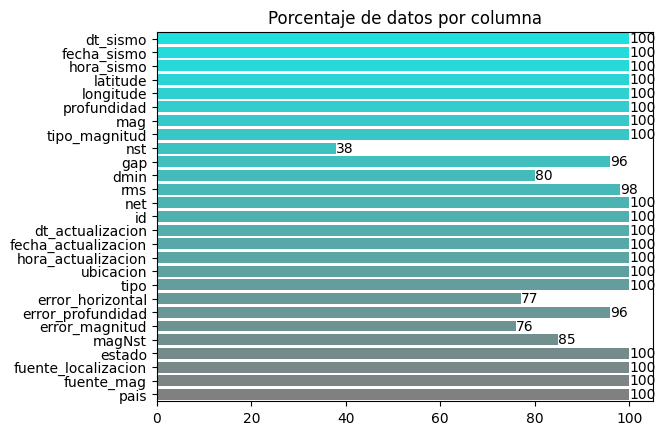

In [13]:
# Definimos una función para generar la paleta de colores personalizada
def custom_palette(n, start_color, end_color):
    start_rgb = np.array(mcolors.hex2color(start_color))
    end_rgb = np.array(mcolors.hex2color(end_color))
    colors = [mcolors.rgb2hex(start_rgb + (i * (end_rgb - start_rgb)))
              for i in np.linspace(0, 1, n)]
    return colors

# Definimos los colores de la paleta
start_color = "#00FFFF"  # Verde agua
end_color = "#808080"    # Gris

# Definimos el número de columnas
num_columns = df.shape[1]

# Creamos la paleta de colores personalizada
paleta = custom_palette(num_columns, start_color, end_color)

# Crea el gráfico de barras con los colores personalizados
ax = sns.barplot(x=(round(df.notnull().sum() * 100 / df.shape[0])).values, y=df.columns, palette=paleta)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de datos por columna')

# Muestra el gráfico
plt.show()


In [ ]:
#Eliminar la columna nst 62% de valores missing

#Drop valores missing de la columna ubicación

# magnitud como dejar todo en una misma escala de valores ml mb mwr